### Ham or Spam - Gerçek mesaj veya İstenmeyen mesaj

#CEP TELEFONLARINA GELEN MESAJLARIN NORMAL Mİ / REKLAM MI OLDUĞUNU ANLAYAN MODEL

In [2]:
#Makine öğrenmesi: Regression-Classification-Clustering silhouette

In [4]:
#pip install wordcloud

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
from nltk.stem.porter import PorterStemmer

from sklearn.svm import SVC
s=SVC()

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")

In [9]:
df=pd.read_csv('spam.csv',encoding='latin=1')

In [10]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [12]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)
#sütunları sildik
#axis=1  sütun silme
#inplace=True : var olan tabloda değişiklik yapar yeni bir değişkene atamaya gerek kalmaz

#silmek yerine istenilen sütünlar da alınabilir

In [13]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
df.columns=['Class','Text']
#Sütun isimlerini değiştirdik

In [15]:
df.head()

,Class,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
df['Label']=df['Class'].map({'ham':0,'spam':1})
#ham olanları 0 a spam olanları 1 e eşitledik
#Label diye yeni bir sütun açtık

In [17]:
df.head()

,Class,Text,Label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


<Axes: xlabel='Class', ylabel='count'>

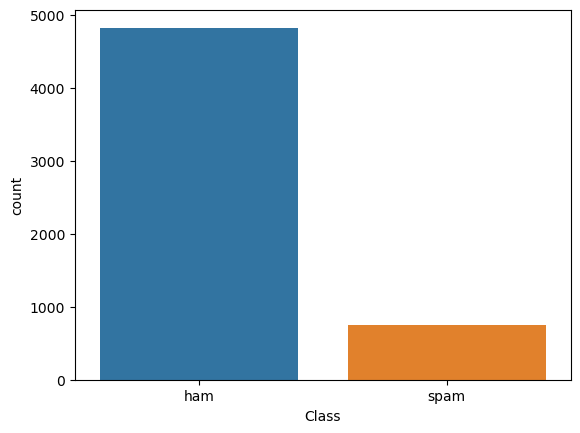

In [18]:
sns.countplot(x=df['Class'])

In [19]:
df.shape

(5572, 3)

In [20]:
df['Text']=df['Text'].str.lower() #küçük harfe çevirdik
df['Text']=df['Text'].str.replace('[^\w\s]','') # noktalama isaretlerini kaldir
df['Text']=df['Text'].str.replace('\d+','') #rakamlari kaldir
df['Text']=df['Text'].str.replace('\r','').replace('\n','') #satır sonlarını ve yeni satır başlarını kaldır



In [21]:
spam=df[df['Class']=='spam']['Text'] #istanmeyen mesajları spam değişkenine atadık
ham=df[df['Class']=='ham']['Text']

#gerçek mesjlar ile spam leri ayırdık değişkenlere eşitledik

In [22]:
from wordcloud import WordCloud

In [30]:
def wc(data,bgcolor):    
    plt.figure(figsize=(10,10))
    wc=WordCloud(background_color=bgcolor)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')


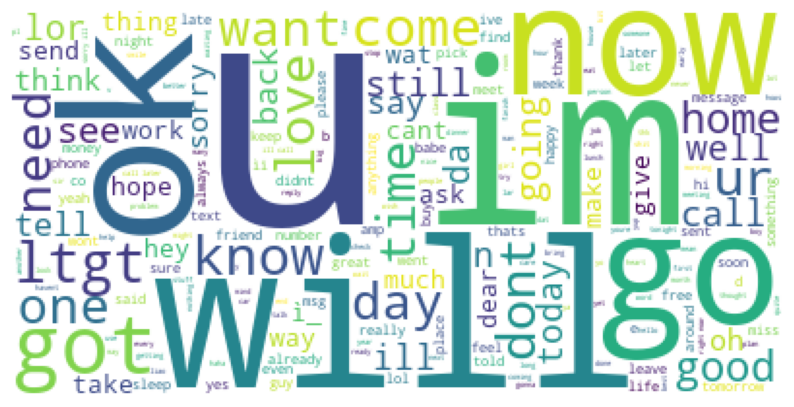

In [31]:
wc(ham,'white')

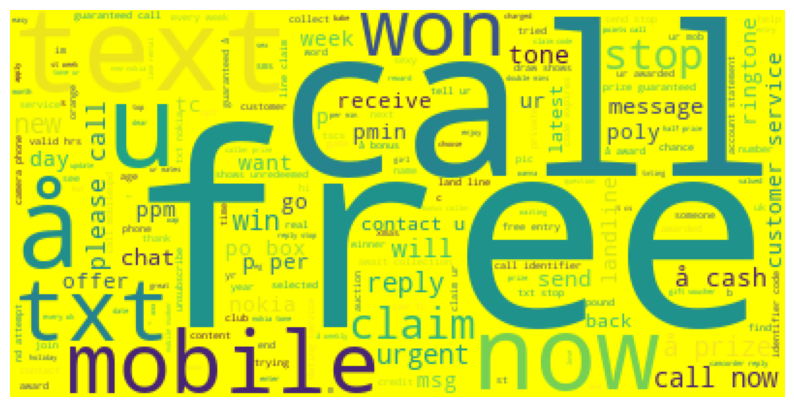

In [34]:
wc(spam,'yellow')

In [35]:
x=df["Text"]
y=df["Label"]

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

#vektöre çeviren paket

In [37]:
vect=CountVectorizer(stop_words='english')

#stop_words='english' gereksiz kelmeleri kaldır

In [38]:
x=vect.fit_transform(x)

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.20)

In [40]:
model=s.fit(x_train,y_train)

In [41]:
tahmin=model.predict(x_test)

In [42]:
accuracy_score(tahmin,y_test)
#yeni gelen mesajların ham mi spam mi olduğunu tahmin etme oranı

0.9695067264573991

In [44]:
#pip install joblib

In [45]:
import joblib

In [47]:
joblib.dump(model,'spammesaj.joblib')

#bu dosyayı kaydettik. gsm firmsına bunu gönderirsek onlar da gelen mesajları bu dosyadan geçirerek hem spam olup olmadığını anlar

['spammesaj.joblib']